<a href="https://colab.research.google.com/github/nitishjoshi86/MachineLearning/blob/main/mnistclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#fetching dataset

from sklearn.datasets import fetch_openml

In [35]:
mnist = fetch_openml('mnist_784') #to import data set of digits

In [36]:
x, y = mnist['data'], mnist['target'] #getting data to axis

In [37]:
x.shape

(70000, 784)

In [38]:
y.shape

(70000,)

In [39]:

%matplotlib inline

In [40]:
import matplotlib
import matplotlib.pyplot as plt


In [41]:
somedigits = x[3600]
somedigitsimage = somedigits.reshape(28, 28) #reshape to 28 x 28 pixels to get image

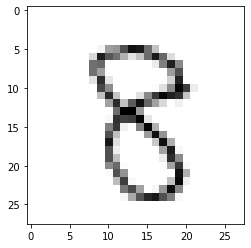

In [42]:
plt.imshow(somedigitsimage, cmap = matplotlib.cm.binary, interpolation='nearest')

In [43]:
y[2592] #here label shows 5, we can directly check label this way

'5'

In [44]:
a_train, a_test = x[:6000], x[6000:] #dumping 60k in train and 10k in test data

In [45]:
b_train, b_test = y[:6000], y[6000:] #same doing with y axis

In [46]:
import numpy as np

In [47]:
shuffle = np.random.permutation(6000) #shuffling dataset for ranomizing for training 
a_train, b_train = a_train[shuffle], b_train[shuffle] #storing it in a and b 

In [48]:
b_train = b_train.astype(np.int8)
b_test = b_test.astype(np.int8)
b_train2 = (b_train != 2)
b_test2 = (b_test != 2)

In [49]:
b_train

array([0, 6, 4, ..., 3, 8, 5], dtype=int8)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
clf =  LogisticRegression()
clf.fit(a_train, b_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
clf.predict([somedigits])

array([ True])

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
a = cross_val_score(clf, a_train, b_train2, cv=3, scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [55]:
a.mean()

0.9540000000000001